In [4]:
# Classification model to detect images as "Happy person" or "Sad person"
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt

In [5]:
# cleaning the data
dataDir = 'data'
image_exts = ['jpeg','jpg', 'bmp', 'png']
for data_file in os.listdir(dataDir): 
    for image in os.listdir(os.path.join(dataDir, data_file)):
        image_path = os.path.join(dataDir, data_file, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                # print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [6]:
#loading data
data = tf.keras.utils.image_dataset_from_directory("data")  # using keras utils to load data
type(data) # not in memory
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next() # batch is of length 2
# 1 is the arrays and 2 is the label (the classes we have)

Found 241 files belonging to 2 classes.


In [7]:
data_iterator

NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x0000026202876640>)

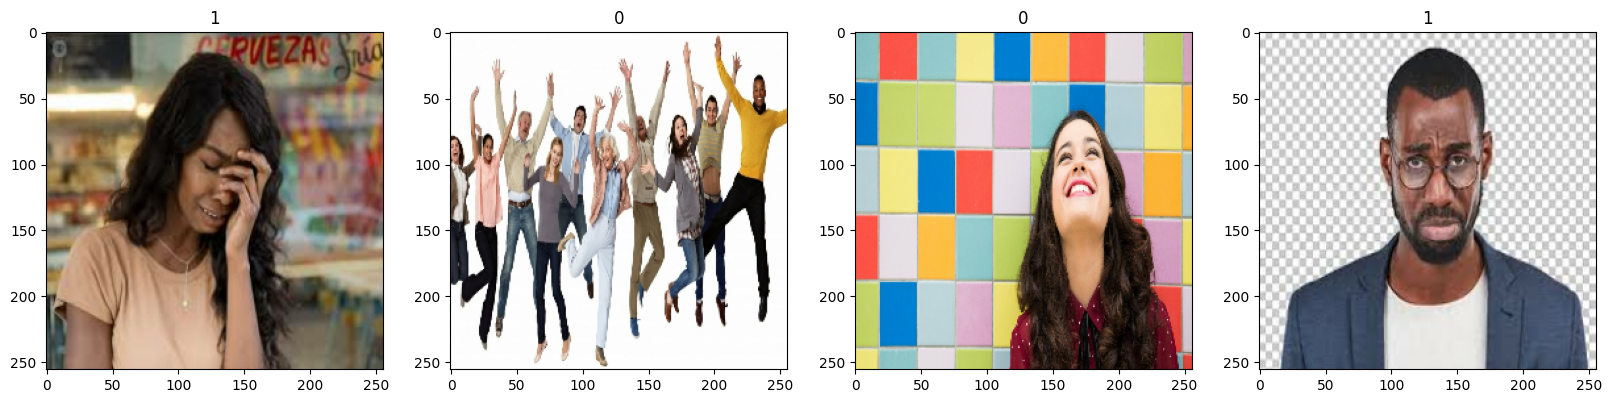

In [8]:
#Script to figure out which label is happy and which one is sad
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
#after running
#Class: 1 = Sad
#Class: 0 = Happy

In [ ]:
# Normalizing data
data = data.map(lambda x,y: (x/255, y))
data.as_numpy_iterator().next() # numbers between 0 and 1 for faster computations